Import the libraries that we will use.

In [1]:
import csv
from datetime import datetime

from matplotlib import pyplot as plt

In [2]:
def get_weather_data(filename, dates, highs, lows, date_index, high_index,
        low_index):
    """Get the highs and lows from a data file."""
    with open(filename) as f:
        reader = csv.reader(f)
        header_row = next(reader)

        # Get dates, and high and low temperatures from this file.
        for row in reader:
            current_date = datetime.strptime(row[date_index], '%Y-%m-%d')
            try:
                high = int(row[high_index])
                low = int(row[low_index])
            except ValueError:
                print(f"Missing data for {current_date}")
            else:
                dates.append(current_date)
                highs.append(high)
                lows.append(low)

Missing data for 2018-02-18 00:00:00


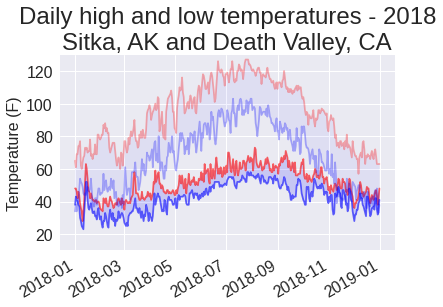

In [3]:
# Get weather data for Sitka.
filename = 'data/sitka_weather_2018_simple.csv'
dates, highs, lows = [], [], []
get_weather_data(filename, dates, highs, lows, date_index=2, high_index=5,
        low_index=6)

# Plot Sitka weather data.
plt.style.use('seaborn')
fig, ax = plt.subplots()
ax.plot(dates, highs, c='red', alpha=0.6)
ax.plot(dates, lows, c='blue', alpha=0.6)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.15)

# Get weather data for Death Valley.
filename = 'data/death_valley_2018_simple.csv'
dates, highs, lows = [], [], []
get_weather_data(filename, dates, highs, lows, date_index=2, high_index=4,
        low_index=5)

# Add Death Valley data to current plot.
ax.plot(dates, highs, c='red', alpha=0.3)
ax.plot(dates, lows, c='blue', alpha=0.3)
plt.fill_between(dates, highs, lows, facecolor='blue', alpha=0.05)

# Format plot.
title = "Daily high and low temperatures - 2018"
title += "\nSitka, AK and Death Valley, CA"
plt.title(title, fontsize=24)
plt.xlabel('', fontsize=16)
fig.autofmt_xdate()
plt.ylabel("Temperature (F)", fontsize=16)
plt.tick_params(axis='both', which='major', labelsize=16)
plt.ylim(10, 130)

plt.show()